In [76]:
import numpy as np
import pandas as pd
import time

In [2]:
N = 600

t = np.arange(0, N, 1).reshape(-1,1)
t = np.array([t[i] + np.random.rand(1)/4 for i in range(len(t))])
t = np.array([t[i] - np.random.rand(1)/7 for i in range(len(t))])
t = np.array(np.round(t, 2))

x1 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x2 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x3 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)

n = np.round((np.random.random(N) * 2).reshape(-1,1), 2)

y = np.array([((np.log(np.abs(2 + x1[t])) - x2[t-1]**2) + 0.02*x3[t-3]*np.exp(x1[t-1])) for t in range(len(t))])
y = np.round(y+n, 2)

In [4]:
n

array([[1.  ],
       [1.75],
       [1.11],
       [1.16],
       [1.84],
       [0.3 ],
       [1.62],
       [0.36],
       [0.57],
       [1.41],
       [0.09],
       [1.81],
       [1.12],
       [1.09],
       [1.84],
       [1.79],
       [1.05],
       [1.79],
       [0.61],
       [0.95],
       [1.01],
       [1.2 ],
       [0.5 ],
       [1.58],
       [1.03],
       [0.02],
       [1.1 ],
       [1.64],
       [0.33],
       [1.64],
       [1.39],
       [0.74],
       [1.37],
       [1.59],
       [0.31],
       [1.55],
       [0.25],
       [0.95],
       [0.99],
       [0.41],
       [1.78],
       [1.89],
       [0.56],
       [1.98],
       [1.71],
       [1.04],
       [0.26],
       [0.57],
       [1.51],
       [0.89],
       [0.16],
       [0.14],
       [0.54],
       [1.9 ],
       [1.18],
       [1.48],
       [0.08],
       [1.56],
       [1.77],
       [0.38],
       [0.46],
       [0.41],
       [0.07],
       [0.4 ],
       [1.65],
       [1.24],
       [0.

In [8]:
dataset = pd.DataFrame(np.concatenate((t, x1, x2, x3, y), axis=1), 
                       columns=['t', 'x1', 'x2', 'x3', 'y'])

deltaT = np.array([(dataset.t[i + 1] - dataset.t[i]) for i in range(len(dataset)-1)])
deltaT = np.concatenate((np.array([0]), deltaT))

dataset.insert(1, '∆t', deltaT)
dataset.head(10)

,t,∆t,x1,x2,x3,y
0,0.02,0.00,1.19,0.47,4.64,-1.53
1,1.09,1.07,4.53,3.07,2.05,3.52
2,1.97,0.88,3.97,1.96,1.34,0.63
3,3.12,1.15,4.11,3.93,4.88,4.05
4,4.20,1.08,3.12,0.72,1.25,-9.47
5,4.99,0.79,0.11,4.18,2.65,1.14
6,5.92,0.93,4.41,3.30,1.14,-13.89
7,7.08,1.16,1.03,2.86,3.47,-7.36
8,8.11,1.03,2.58,0.01,2.88,-5.94
9,9.00,0.89,2.45,1.58,0.35,3.20


In [13]:
dataset[dataset.columns[1]][1]

1.07

In [35]:
dataset.shape

(600, 6)

# Helper functions for reshaping

In [94]:
window_size = 4
columns_size = dataset.shape[1]
create_a_row = []
for r in range(dataset.shape[0]-window_size+1):
    create_a_row.append({})
    for row in range(window_size):
        for col in dataset.columns:
            if(col=="y" and row ==window_size-1):
                continue
            elif(col == "y"):
                continue
            else:
                create_a_row[r][f"{col}({row})"] = dataset[col][row+r]
    

In [95]:
create_a_row

[{'t(0)': 0.02,
  '∆t(0)': 0.0,
  'x1(0)': 1.19,
  'x2(0)': 0.47,
  'x3(0)': 4.64,
  't(1)': 1.09,
  '∆t(1)': 1.07,
  'x1(1)': 4.53,
  'x2(1)': 3.07,
  'x3(1)': 2.05,
  't(2)': 1.97,
  '∆t(2)': 0.8799999999999999,
  'x1(2)': 3.97,
  'x2(2)': 1.96,
  'x3(2)': 1.34,
  't(3)': 3.12,
  '∆t(3)': 1.1500000000000001,
  'x1(3)': 4.11,
  'x2(3)': 3.93,
  'x3(3)': 4.88},
 {'t(0)': 1.09,
  '∆t(0)': 1.07,
  'x1(0)': 4.53,
  'x2(0)': 3.07,
  'x3(0)': 2.05,
  't(1)': 1.97,
  '∆t(1)': 0.8799999999999999,
  'x1(1)': 3.97,
  'x2(1)': 1.96,
  'x3(1)': 1.34,
  't(2)': 3.12,
  '∆t(2)': 1.1500000000000001,
  'x1(2)': 4.11,
  'x2(2)': 3.93,
  'x3(2)': 4.88,
  't(3)': 4.2,
  '∆t(3)': 1.08,
  'x1(3)': 3.12,
  'x2(3)': 0.72,
  'x3(3)': 1.25},
 {'t(0)': 1.97,
  '∆t(0)': 0.8799999999999999,
  'x1(0)': 3.97,
  'x2(0)': 1.96,
  'x3(0)': 1.34,
  't(1)': 3.12,
  '∆t(1)': 1.1500000000000001,
  'x1(1)': 4.11,
  'x2(1)': 3.93,
  'x3(1)': 4.88,
  't(2)': 4.2,
  '∆t(2)': 1.08,
  'x1(2)': 3.12,
  'x2(2)': 0.72,
  'x3(2)':

In [96]:
trainset = pd.DataFrame(create_a_row)
trainset

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),t(2),∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.02,0.00,1.19,0.47,4.64,1.09,1.07,4.53,3.07,2.05,1.97,0.88,3.97,1.96,1.34,3.12,1.15,4.11,3.93,4.88
1,1.09,1.07,4.53,3.07,2.05,1.97,0.88,3.97,1.96,1.34,3.12,1.15,4.11,3.93,4.88,4.20,1.08,3.12,0.72,1.25
2,1.97,0.88,3.97,1.96,1.34,3.12,1.15,4.11,3.93,4.88,4.20,1.08,3.12,0.72,1.25,4.99,0.79,0.11,4.18,2.65
3,3.12,1.15,4.11,3.93,4.88,4.20,1.08,3.12,0.72,1.25,4.99,0.79,0.11,4.18,2.65,5.92,0.93,4.41,3.30,1.14
4,4.20,1.08,3.12,0.72,1.25,4.99,0.79,0.11,4.18,2.65,5.92,0.93,4.41,3.30,1.14,7.08,1.16,1.03,2.86,3.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.95,0.91,4.25,2.77,4.04,593.00,1.05,1.05,3.83,1.60,594.08,1.08,3.28,3.74,2.95,595.08,1.00,0.86,3.99,1.91
593,593.00,1.05,1.05,3.83,1.60,594.08,1.08,3.28,3.74,2.95,595.08,1.00,0.86,3.99,1.91,595.92,0.84,1.85,1.53,3.78
594,594.08,1.08,3.28,3.74,2.95,595.08,1.00,0.86,3.99,1.91,595.92,0.84,1.85,1.53,3.78,597.10,1.18,3.41,4.68,1.15
595,595.08,1.00,0.86,3.99,1.91,595.92,0.84,1.85,1.53,3.78,597.10,1.18,3.41,4.68,1.15,598.04,0.94,2.05,4.21,1.79


In [97]:
create_target_value = dataset["y"][window_size-1:].values

In [98]:
trainset["target_y"] = create_target_value

In [99]:
trainset.loc[0:500,:]

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),...,∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3),target_y
0,0.02,0.00,1.19,0.47,4.64,1.09,1.07,4.53,3.07,2.05,...,0.88,3.97,1.96,1.34,3.12,1.15,4.11,3.93,4.88,4.05
1,1.09,1.07,4.53,3.07,2.05,1.97,0.88,3.97,1.96,1.34,...,1.15,4.11,3.93,4.88,4.20,1.08,3.12,0.72,1.25,-9.47
2,1.97,0.88,3.97,1.96,1.34,3.12,1.15,4.11,3.93,4.88,...,1.08,3.12,0.72,1.25,4.99,0.79,0.11,4.18,2.65,1.14
3,3.12,1.15,4.11,3.93,4.88,4.20,1.08,3.12,0.72,1.25,...,0.79,0.11,4.18,2.65,5.92,0.93,4.41,3.30,1.14,-13.89
4,4.20,1.08,3.12,0.72,1.25,4.99,0.79,0.11,4.18,2.65,...,0.93,4.41,3.30,1.14,7.08,1.16,1.03,2.86,3.47,-7.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.21,1.06,4.45,3.49,0.89,497.19,0.98,1.67,3.19,2.66,...,0.97,1.74,3.04,3.52,498.95,0.79,0.48,1.05,0.91,-6.93
497,497.19,0.98,1.67,3.19,2.66,498.16,0.97,1.74,3.04,3.52,...,0.79,0.48,1.05,0.91,499.95,1.00,0.24,2.25,1.01,1.70
498,498.16,0.97,1.74,3.04,3.52,498.95,0.79,0.48,1.05,0.91,...,1.00,0.24,2.25,1.01,500.96,1.01,3.81,0.41,2.76,-2.53
499,498.95,0.79,0.48,1.05,0.91,499.95,1.00,0.24,2.25,1.01,...,1.01,3.81,0.41,2.76,502.05,1.09,4.82,4.73,2.84,2.79


In [100]:
ml_trainset = trainset.loc[0:500,:]
ml_testset = trainset.loc[501:,:]

In [78]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(ml_trainset.iloc[:,:-1], ml_trainset.iloc[:,-1])

t0 = time.time()
lr_y = ml_testset['target_y'].values
lr_y_fit = lr_model.predict(ml_trainset.iloc[:,:-1])
lr_y_pred = lr_model.predict(ml_testset.iloc[:,:-1])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 2.48
Time to train = 0.01 seconds


In [84]:
len(lr_y_pred)

96

In [85]:
from matplotlib import pyplot as plt

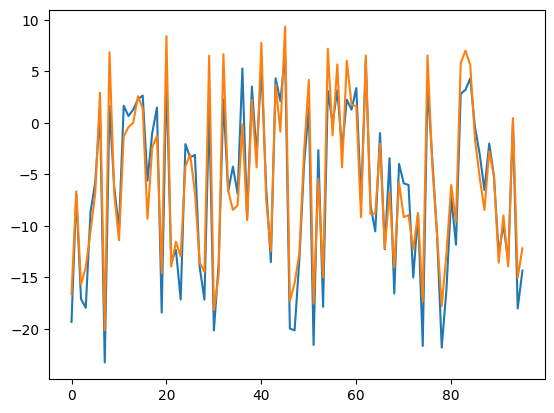

In [90]:
plt.plot([i for i in range(len(lr_y))],lr_y,label = "Actual y")
plt.plot([i for i in range(len(lr_y))],lr_y_pred,label = "Predicted y")
plt.show()

In [88]:
[i for i in range(len(lr_y))]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95]